Je vais présenter ici quelques résultats obtenus grâce à l'extraction de données faites sur Androzoo

In [146]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

from sklearn import preprocessing
import torch
from sklearn import svm
from sklearn import tree
import pandas as pd
from sklearn.externals import joblib
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("----------GOODWARE MOST USED PERMISSION ----------")

df = pd.read_csv('binaryApps_300_Benign.csv', sep=',')
total_rows = df['android'].count
df= df[:361]
#We remove the last column to insert the label identification
df = df.iloc[: , :-1]
#We calculate the sum of all permission used by benign application and print the top 10
print(pd.Series.sort_values(df[df.android==0].sum(axis=0), ascending=False)[0:10])

df2 = pd.read_csv('binaryApps_500_malware.csv', sep=',')
df2 = df2[:361]
df2 = df2.iloc[: , :-1]
print("-----------MALWARE MOST USED PERMISSION -----------")
print(pd.Series.sort_values(df2[df2.android==0].sum(axis=0), ascending=False)[0:10])

----------GOODWARE MOST USED PERMISSION ----------
android.permission.INTERNET                  356
android.permission.ACCESS_NETWORK_STATE      345
android.permission.READ_PHONE_STATE          337
android.permission.WRITE_EXTERNAL_STORAGE    329
android.permission.ACCESS_WIFI_STATE         289
android.permission.ACCESS_COARSE_LOCATION    203
android.permission.GET_TASKS                 202
android.permission.ACCESS_FINE_LOCATION      184
android.permission.WAKE_LOCK                 180
android.permission.RECEIVE_BOOT_COMPLETED    156
dtype: int64
-----------MALWARE MOST USED PERMISSION -----------
android.permission.INTERNET                  353
android.permission.READ_PHONE_STATE          337
android.permission.ACCESS_NETWORK_STATE      301
android.permission.READ_SMS                  237
android.permission.ACCESS_WIFI_STATE         230
android.permission.WRITE_EXTERNAL_STORAGE    224
android.permission.RECEIVE_BOOT_COMPLETED    201
android.permission.WRITE_SMS                 191
an

Ci-dessus, le top 10 des permissions les plus utilisées chez les malwares et goodwares

THIS IS THE MALWARE TOP 10


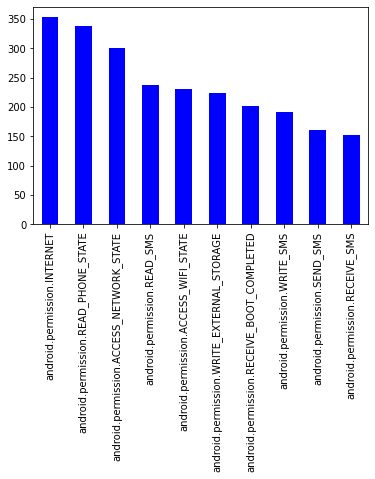

In [134]:
print("THIS IS THE MALWARE TOP 10")

pd.Series.sort_values(df2[df2.android==0].sum(axis=0), ascending=False)[0:10].plot.bar(color="blue")

Ci-dessus, le graphique des droits utilisés par les malwares et ci-dessous le graphique des permissions utilisées par les goodwares

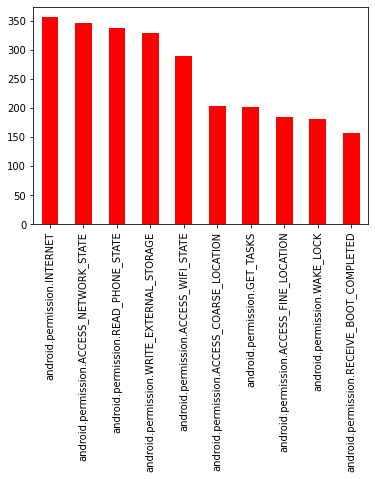

In [135]:
pd.Series.sort_values(df[df.android==0].sum(axis=0), ascending=False)[0:10].plot.bar(color="red")

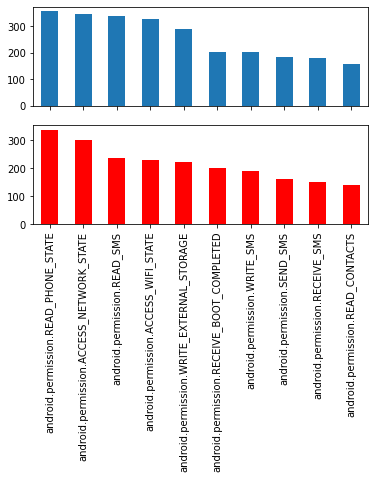

In [136]:
fig, axs =  plt.subplots(nrows=2, sharex=True)
pd.Series.sort_values(df[df.android==0].sum(axis=0), ascending=False)[:10].plot.bar(ax=axs[0])
pd.Series.sort_values(df2[df2.android==0].sum(axis=0), ascending=False)[1:11].plot.bar(ax=axs[1], color="red")

Rappel : Bleu = malware, rouge = goodware.
En comparant le top 10 du malware et en le comparant au goodware, nous constatons déjà des différences sur les permissions utilisées.

In [137]:
# We label the dataset and concatenate
df.insert(330, "malware", "0")
df2.insert(330, "malware", "1")
df = pd.concat([df, df2])

In [138]:
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import roc_auc_score as auc_score
from sklearn.linear_model import LogisticRegression as LG
from sklearn.metrics import confusion_matrix as cm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score as f1

Nous allons ci-dessous séparer et mélanger le dataset

In [139]:
label_encoder = LabelEncoder()
output_integer_encoded = label_encoder.fit_transform(df['malware'])

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:-1], output_integer_encoded,
                                                    test_size=0.5, random_state=42)

Ci-dessous, la régression linéaire

Logistic Regression
 


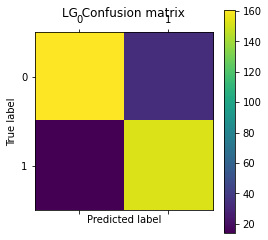

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       175
           1       0.92      0.82      0.87       186

    accuracy                           0.87       361
   macro avg       0.87      0.87      0.87       361
weighted avg       0.87      0.87      0.87       361



In [140]:
# Train our model with LogisticRegression
clf = LG().fit(X_train, y_train)

# Model Prediction
y_pred = clf.predict(X_test)

print("Logistic Regression")

print(" ")
LG_cm = cm(y_test, y_pred)

plt.matshow(LG_cm)
plt.title('LG Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(y_pred, y_test, labels=None))

Ci-dessous la Random Forest Classifier

Random Forest Classifier for Upsampled dataset:
 


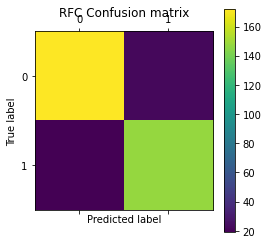

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       191
           1       0.89      0.87      0.88       170

    accuracy                           0.89       361
   macro avg       0.89      0.89      0.89       361
weighted avg       0.89      0.89      0.89       361



In [141]:

# Train model with Random Forest Classifier
RFC_clf = RandomForestClassifier()
RFC_clf = RFC_clf.fit(X_train, y_train)

# Model Prediction
y_pred = RFC_clf.predict(X_test)

print("Random Forest Classifier for Upsampled dataset:")


RFC_cm = cm(y_test, y_pred)

print(" ")

# Show confusion matrix in a separate window
plt.matshow(RFC_cm)
plt.title('RFC Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(y_pred, y_test, labels=None))

Ici nous allons utiliser Naives Bayes 

 
              precision    recall  f1-score   support

           0       0.52      0.98      0.68       103
           1       0.99      0.64      0.78       258

    accuracy                           0.74       361
   macro avg       0.75      0.81      0.73       361
weighted avg       0.85      0.74      0.75       361

 


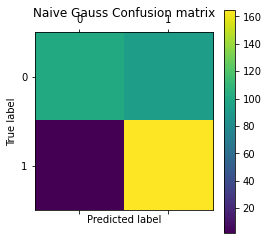

In [142]:
# features_train, features_test, labels_train, labels_test
# Naives Bayes algorithm
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# y_pred
y_pred = gnb.predict(X_test)


print(" ")

print(classification_report(y_pred, y_test, labels=None))
GNB_cm = cm(y_test, y_pred)

print(" ")
# Show confusion matrix in a separate window
plt.matshow(GNB_cm)
plt.title('Naive Gauss Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Ici le Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       182
           1       0.92      0.86      0.89       179

    accuracy                           0.89       361
   macro avg       0.90      0.89      0.89       361
weighted avg       0.90      0.89      0.89       361

 


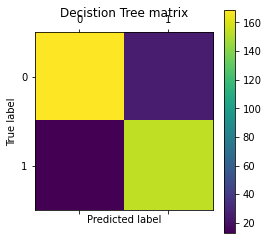

In [143]:
# Decision Tree Classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
# accuracy

print(classification_report(y_pred, y_test, labels=None))
DTC_cm = cm(y_test, y_pred)

print(" ")
# Show confusion matrix in a separate window
plt.matshow(DTC_cm)
plt.title('Decistion Tree matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


K-N

kneighbors 3
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       181
           1       0.92      0.86      0.89       180

    accuracy                           0.89       361
   macro avg       0.89      0.89      0.89       361
weighted avg       0.89      0.89      0.89       361

 


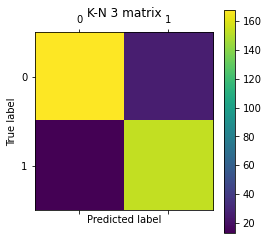


kneighbors 6
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       201
           1       0.82      0.86      0.84       160

    accuracy                           0.85       361
   macro avg       0.85      0.85      0.85       361
weighted avg       0.85      0.85      0.85       361

 


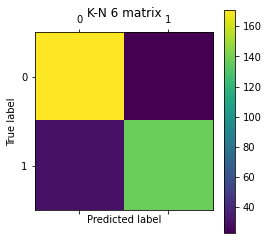


kneighbors 9
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       188
           1       0.86      0.83      0.84       173

    accuracy                           0.85       361
   macro avg       0.85      0.85      0.85       361
weighted avg       0.85      0.85      0.85       361

 


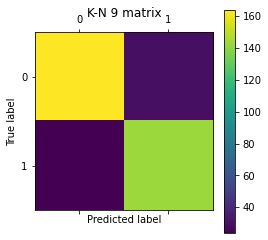


kneighbors 12
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       197
           1       0.84      0.86      0.85       164

    accuracy                           0.86       361
   macro avg       0.86      0.86      0.86       361
weighted avg       0.86      0.86      0.86       361

 


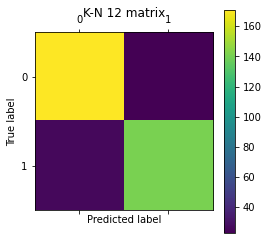


kneighbors 15
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       185
           1       0.86      0.81      0.83       176

    accuracy                           0.84       361
   macro avg       0.84      0.84      0.84       361
weighted avg       0.84      0.84      0.84       361

 


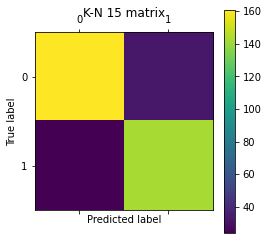


kneighbors 18
              precision    recall  f1-score   support

           0       0.84      0.88      0.85       185
           1       0.86      0.82      0.84       176

    accuracy                           0.85       361
   macro avg       0.85      0.85      0.85       361
weighted avg       0.85      0.85      0.85       361

 


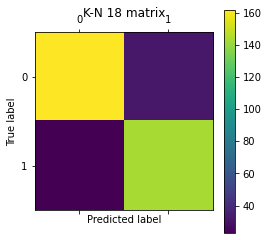


kneighbors 21
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       185
           1       0.85      0.81      0.83       176

    accuracy                           0.84       361
   macro avg       0.84      0.84      0.84       361
weighted avg       0.84      0.84      0.84       361

 


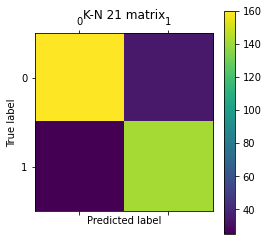


kneighbors 24
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       183
           1       0.85      0.80      0.82       178

    accuracy                           0.83       361
   macro avg       0.83      0.83      0.83       361
weighted avg       0.83      0.83      0.83       361

 


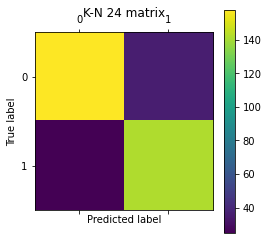


kneighbors 27
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       168
           1       0.93      0.80      0.86       193

    accuracy                           0.86       361
   macro avg       0.87      0.87      0.86       361
weighted avg       0.87      0.86      0.86       361

 


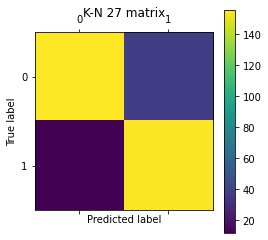

In [144]:
for i in range(3, 30, 3):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)

    print("kneighbors {}".format(i))

    print(classification_report(y_pred, y_test, labels=None))
    K_cm = cm(y_test, y_pred)

    print(" ")
    # Show confusion matrix in a separate window
    plt.matshow(K_cm)
    plt.title("K-N {} matrix".format(i))
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print("")

SVC

[LibSVM]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       195
           1       0.86      0.86      0.86       166

    accuracy                           0.87       361
   macro avg       0.87      0.87      0.87       361
weighted avg       0.87      0.87      0.87       361

 


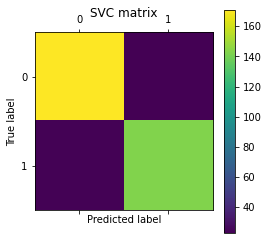

In [145]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = SVC(kernel = 'poly', degree=3, verbose = 1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("")
print(classification_report(y_pred, y_test, labels=None))

SVC_cm = confusion_matrix(y_test, y_pred)

print(" ")
# Show confusion matrix in a separate window
plt.matshow(SVC_cm)
plt.title('SVC matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print("")

Pour l'ensemble que j'ai généré, nous obtenons des résultats tout juste satisfaisant. Un autre Notebook dédié à un ensemble de 1000 malwares et de 1000 applications bénignes sera testé. Notons toutefois le résultat insuffisant de Naive Bayes. 